<a href="https://colab.research.google.com/github/WarunaDissanayake1234/CNN-for-CIFAR-10-Classification/blob/main/Image_Class_prediction_based_on_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolutional Neural Network (CNN) using TensorFlow's Keras API for the CIFAR-10 dataset

Importing dependencies

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Load and split the DATASET

Loading CIFAR-10 Dataset:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data(): This line loads the CIFAR-10 dataset using TensorFlow's datasets.cifar10.load_data() function.

It retrieves both training and testing sets along with their corresponding labels.


In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

#Normalize pixal values to between 0 and 1
train_images, test_images = train_images/255, test_images/255

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'house', 'ship', 'truck']




Lets look at a one Image

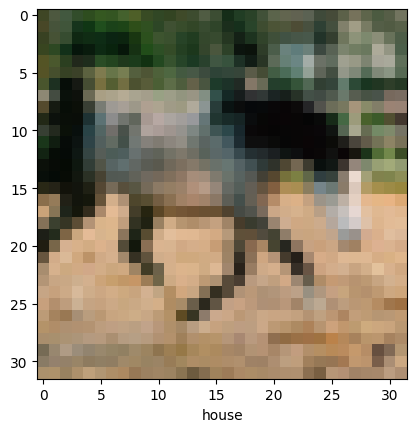

In [12]:
IMG_INDEX = 52 #Change this to look at other images

plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(class_names[train_labels[IMG_INDEX][0]])
plt.show()


CNN Architecture


In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3),activation='relu', input_shape=(32, 32 ,3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

In [17]:
model.summary()#stack layers

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

Adding Dense layers

In [19]:
# prompt:

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

Training the model

In [20]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=4, validation_data=(test_images, test_labels))


Epoch 1/4
1563/1563 [==============================] - 67s 42ms/step - loss: 1.6045 - accuracy: 0.4033 - val_loss: 1.3869 - val_accuracy: 0.4899
Epoch 2/4
1563/1563 [==============================] - 65s 42ms/step - loss: 1.2451 - accuracy: 0.5505 - val_loss: 1.1506 - val_accuracy: 0.5911
Epoch 3/4
1563/1563 [==============================] - 65s 41ms/step - loss: 1.0948 - accuracy: 0.6095 - val_loss: 1.0716 - val_accuracy: 0.6200
Epoch 4/4
1563/1563 [==============================] - 69s 44ms/step - loss: 0.9936 - accuracy: 0.6472 - val_loss: 0.9746 - val_accuracy: 0.6568


Evaluating the model

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)


313/313 - 3s - loss: 0.9746 - accuracy: 0.6568 - 3s/epoch - 11ms/step
0.6567999720573425
